## **no sklearn cross validation or model selection feature.... try to not use it as much as possible**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
## dataframe

iris_data = pd.read_csv(r"iris.csv")
column=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]

iris_data.columns = column



In [3]:
## numpy array

from sklearn import datasets
iris = datasets.load_iris()
y = iris.target
X = iris.data

#### Task A

In [4]:
train, validate, test = np.split(iris_data.sample(frac=1), [int(.5*len(iris_data)), int(.75*len(iris_data))])

In [5]:
print(len(train))
print(len(validate))
print(len(test))

print(type(validate))

75
37
38
<class 'pandas.core.frame.DataFrame'>


#### Task B

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

Training on k=1,3,5

In [7]:
k_value_trials = [1,3,5]

train_accuracies = []
test_accuracies = []

In [8]:
for k in k_value_trials:
    
    
    print("_" *62)
    print("K-Value used for this round of Classification is : "+ str(k))
    model_knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    model_knn.fit(train.iloc[:,0:4], train.iloc[:,-1:])
    train_score = metrics.accuracy_score(train.iloc[:,-1:], model_knn.predict(train.iloc[:,0:4]))
    print("Training Accuracy for the Model:   %0.5f" % train_score)
    train_accuracies.append(train_score)
    
    pred = model_knn.predict(validate.iloc[:,0:4])

    score = metrics.accuracy_score(validate.iloc[:,-1:], pred)
    print("Observed Validation Accuracy:   %0.5f" % score)
    test_accuracies.append(score)

    print("Comparison of Classification :  ")
    print(metrics.classification_report(validate.iloc[:,-1:], pred))

    print("Representation Using Confusion Matrix:")
    print(metrics.confusion_matrix(validate.iloc[:,-1:], pred))

______________________________________________________________
K-Value used for this round of Classification is : 1
Training Accuracy for the Model:   1.00000
Observed Validation Accuracy:   0.97297
Comparison of Classification :  
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.90      0.95        10
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.98      0.97      0.97        37

Representation Using Confusion Matrix:
[[15  0  0]
 [ 0  9  1]
 [ 0  0 12]]
______________________________________________________________
K-Value used for this round of Classification is : 3
Training Accuracy for the Model:   0.96000
Observed Validation Accuracy:   0.97297
Comparison of Classification :  
              precision    recall  f1-score   support

      setosa       1.00 

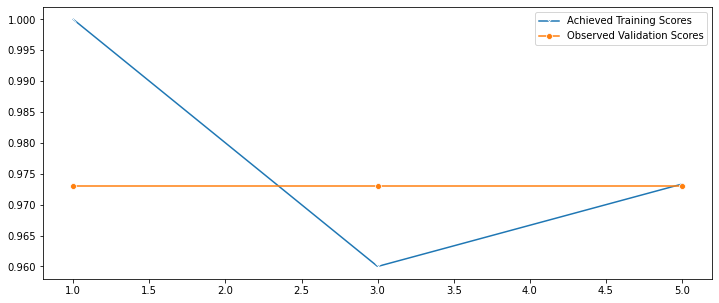

In [9]:
plt.figure(figsize=(12,5))
p = sns.lineplot(k_value_trials,train_accuracies,marker='x',label="Achieved Training Scores")
p = sns.lineplot(k_value_trials,test_accuracies,marker='o',label="Observed Validation Scores")

#### Task C ---- Optional

In [10]:
def knn_hyperparameter_tuning(X_train,y_train):
    print("Grid Search Utility for Finding an Optimal Value of k")  
    print("_" *55)

    # Set the parameters by cross-validation

#     tuned_parameters = [{'algorithm': ['auto','brute'], 'n_neighbors': [8,9,10,6,5,3,1,11,12,13,14,16,15]}]
    tuned_parameters = [{'algorithm': ['auto'], 'n_neighbors': range(1,16)}]
    scores = ['accuracy']
    
    for score in scores:
        print("Tuning the hyperparameter for improved %s..." % score)
        print()
    
        clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=10,
                           scoring='%s' % score)
        clf.fit(X_train, y_train)
    
       
        print("Achieved Grid Scores :")
        print("_" *30)
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
                  print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()
        
        print("Best Parameter Observed : ")
        print("_" *30)
        print()
        print(clf.best_params_)
        print()
        
        
knn_hyperparameter_tuning(train.iloc[:,0:4], train.iloc[:,-1:])

Grid Search Utility for Finding an Optimal Value of k
_______________________________________________________
Tuning the hyperparameter for improved accuracy...

Achieved Grid Scores :
______________________________

0.934 (+/-0.174) for {'algorithm': 'auto', 'n_neighbors': 1}
0.921 (+/-0.171) for {'algorithm': 'auto', 'n_neighbors': 2}
0.934 (+/-0.133) for {'algorithm': 'auto', 'n_neighbors': 3}
0.948 (+/-0.127) for {'algorithm': 'auto', 'n_neighbors': 4}
0.975 (+/-0.100) for {'algorithm': 'auto', 'n_neighbors': 5}
0.975 (+/-0.100) for {'algorithm': 'auto', 'n_neighbors': 6}
0.963 (+/-0.115) for {'algorithm': 'auto', 'n_neighbors': 7}
0.948 (+/-0.127) for {'algorithm': 'auto', 'n_neighbors': 8}
0.963 (+/-0.115) for {'algorithm': 'auto', 'n_neighbors': 9}
0.975 (+/-0.100) for {'algorithm': 'auto', 'n_neighbors': 10}
0.963 (+/-0.115) for {'algorithm': 'auto', 'n_neighbors': 11}
0.923 (+/-0.202) for {'algorithm': 'auto', 'n_neighbors': 12}
0.923 (+/-0.202) for {'algorithm': 'auto', 'n_ne

#### Task D

In [16]:
model_knn_c = KNeighborsClassifier(n_neighbors=5,algorithm="auto")
model_knn_c.fit(train.iloc[:,0:4], train.iloc[:,-1:])
train_score_c = metrics.accuracy_score(train.iloc[:,-1:], model_knn_c.predict(train.iloc[:,0:4]))
print("Training accuracy:   %0.5f" % train_score_c)
#train_accuracies.append(train_score)

pred_c = model_knn_c.predict(test.iloc[:,0:4])

score_c = metrics.accuracy_score(test.iloc[:,-1:], pred_c)
print("Validation accuracy:   %0.5f" % score_c)
#test_accuracies.append(score)

print("Details of Classification")
print(metrics.classification_report(test.iloc[:,-1:], pred_c))

print("Representation using Confusion matrix:")
print(metrics.confusion_matrix(test.iloc[:,-1:], pred_c))

ValueError: could not convert string to float: 'versicolor'

#### Task E

run model for k=1,3,5 for cv=5 and calc.. avg score(accuracies).. select the best model

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [13]:
kf = KFold(n_splits=5,shuffle=True)

k_value = [1,3,5]

train_accuracies = []
test_accuracies = []

In [14]:
df_e = train.iloc[:,0:4]
y_e = train.iloc[:,-1:]

In [15]:
for k in k_value:
    
    
    print("_" *60)
    print("K-Value: "+ str(k))
    model_knn = KNeighborsClassifier(n_neighbors=k)
    
    
    #all_accuracies = cross_val_score(estimator=model_knn, X=train.iloc[:,0:4], y=train.iloc[:,-1:], cv=5)
    #print(all_accuracies)
    test_acc_e= []
    scores_e = []
    for i in range(5):
        result = next(kf.split(df_e),None)
        X_train_e = df_e.iloc[result[0]]
        X_test_e = df_e.iloc[result[1]]
        y_train_e = y_e.iloc[result[0]]
        y_test_e = y_e.iloc[result[1]]
        
        model_e = model_knn.fit(X_train_e,y_train_e)
        pred_e = model_e.predict(X_test_e)
        testacc_e = metrics.accuracy_score(y_test_e, pred_e)
        test_acc_e.append(testacc_e)
        
        scores_e.append(model_e.score(X_test_e,y_test_e))
    print("Mean Test Accuracies " , np.mean(test_acc_e))
    print("Average error :  ", (1-np.mean(scores_e)))
    
        
    """
    model_knn.fit(train.iloc[:,0:4], train.iloc[:,-1:])
    train_score = metrics.accuracy_score(train.iloc[:,-1:], model_knn.predict(train.iloc[:,0:4]))
    print("Train accuracy:   %0.5f" % all_accuracies.mean())
    train_accuracies.append(all_accuracies.mean())
    
    
    pred = model_knn.predict(validate.iloc[:,0:4])

    score = metrics.accuracy_score(validate.iloc[:,-1:], pred)
    print("Validate accuracy:   %0.5f" % score)
    test_accuracies.append(score)

    print("classification report:")
    print(metrics.classification_report(validate.iloc[:,-1:], pred))

    print("confusion matrix:")
    print(metrics.confusion_matrix(validate.iloc[:,-1:], pred))
    
    """

____________________________________________________________
K-Value: 1
Mean Test Accuracies  0.9733333333333334
Average error :   0.026666666666666616
____________________________________________________________
K-Value: 3
Mean Test Accuracies  0.9466666666666667
Average error :   0.053333333333333344
____________________________________________________________
K-Value: 5
Mean Test Accuracies  0.96
Average error :   0.040000000000000036


#### Task f